# Visualization of Results

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import os
import sympy
import pickle


from DAG_search import utils
from DAG_search import config
from DAG_search import dag_search
from DAG_search import comp_graph
from DAG_search import simplifications

from regressors import regressors

In [2]:
import importlib
importlib.reload(config)
importlib.reload(dag_search)
importlib.reload(comp_graph)
importlib.reload(utils)
importlib.reload(sympy)

<module 'sympy' from 'C:\\Users\\Paul Kahlmeyer\\anaconda3\\envs\\SymbReg\\lib\\site-packages\\sympy\\__init__.py'>

## AIFeynman Simplification

TODO:
- Keep only symmetry


In [559]:
# Problem
import pickle
ds_name = 'Feynman' # Strogatz, Feynman, Nguyen, Univ  
load_path = f'datasets/{ds_name}/tasks.p'
with open(load_path, 'rb') as handle:
    task_dict = pickle.load(handle)


problem = 'I.10.7'
X = task_dict[problem]['X']
y = task_dict[problem]['y']


i = 0
y = y[:, i]
expr_true = task_dict[problem]['expr'][i]
X.shape, y.shape

# Approximation
from sklearn.metrics import r2_score
f_app = dag_search.BaseReg(degree = 5)
f_app.fit(X, y)
f_rms = np.sqrt(np.mean((y - f_app.predict(X))**2))
f_rms

0.0032522606324158028

In [560]:
expr_true

x_0/sqrt(-x_1**2/x_2**2 + 1)

In [541]:
task_dict.keys()

dict_keys(['I.10.7', 'I.11.19', 'I.12.1', 'I.12.11', 'I.12.2', 'I.12.4', 'I.12.5', 'I.13.12', 'I.13.4', 'I.14.3', 'I.14.4', 'I.15.3t', 'I.15.3x', 'I.16.6', 'I.18.12', 'I.18.14', 'I.18.4', 'I.24.6', 'I.25.13', 'I.27.6', 'I.29.16', 'I.29.4', 'I.30.3', 'I.32.17', 'I.32.5', 'I.34.1', 'I.34.14', 'I.34.27', 'I.34.8', 'I.37.4', 'I.38.12', 'I.39.1', 'I.39.11', 'I.39.22', 'I.40.1', 'I.41.16', 'I.43.16', 'I.43.31', 'I.43.43', 'I.44.4', 'I.47.23', 'I.50.26', 'I.6.2', 'I.6.2a', 'I.6.2b', 'I.8.14', 'I.9.18', 'II.10.9', 'II.11.20', 'II.11.27', 'II.11.28', 'II.11.3', 'II.13.17', 'II.13.23', 'II.13.34', 'II.15.4', 'II.15.5', 'II.2.42', 'II.21.32', 'II.24.17', 'II.27.16', 'II.27.18', 'II.3.24', 'II.34.11', 'II.34.2', 'II.34.29a', 'II.34.29b', 'II.34.2a', 'II.35.18', 'II.35.21', 'II.36.38', 'II.37.1', 'II.38.14', 'II.38.3', 'II.4.23', 'II.6.11', 'II.6.15a', 'II.6.15b', 'II.8.31', 'II.8.7', 'III.10.19', 'III.12.43', 'III.13.18', 'III.14.14', 'III.15.12', 'III.15.14', 'III.15.27', 'III.17.37', 'III.19.51'

In [561]:
for problem in task_dict:
    print(problem, task_dict[problem]['X'].shape[1])

I.10.7 3
I.11.19 6
I.12.1 2
I.12.11 5
I.12.2 4
I.12.4 3
I.12.5 2
I.13.12 5
I.13.4 4
I.14.3 3
I.14.4 2
I.15.3t 4
I.15.3x 4
I.16.6 3
I.18.12 3
I.18.14 4
I.18.4 4
I.24.6 4
I.25.13 2
I.27.6 3
I.29.16 4
I.29.4 2
I.30.3 3
I.32.17 6
I.32.5 4
I.34.1 3
I.34.14 3
I.34.27 2
I.34.8 4
I.37.4 3
I.38.12 4
I.39.1 2
I.39.11 3
I.39.22 4
I.40.1 6
I.41.16 5
I.43.16 4
I.43.31 3
I.43.43 4
I.44.4 5
I.47.23 3
I.50.26 4
I.6.2 2
I.6.2a 1
I.6.2b 3
I.8.14 4
I.9.18 9
II.10.9 3
II.11.20 5
II.11.27 4
II.11.28 2
II.11.3 5
II.13.17 4
II.13.23 3
II.13.34 3
II.15.4 3
II.15.5 3
II.2.42 5
II.21.32 5
II.24.17 3
II.27.16 3
II.27.18 2
II.3.24 2
II.34.11 4
II.34.2 3
II.34.29a 3
II.34.29b 5
II.34.2a 3
II.35.18 5
II.35.21 5
II.36.38 8
II.37.1 3
II.38.14 2
II.38.3 4
II.4.23 3
II.6.11 4
II.6.15a 6
II.6.15b 4
II.8.31 2
II.8.7 3
III.10.19 4
III.12.43 2
III.13.18 4
III.14.14 5
III.15.12 3
III.15.14 3
III.15.27 3
III.17.37 3
III.19.51 5
III.21.20 4
III.4.32 4
III.4.33 4
III.7.38 3
III.8.54 3
III.9.52 6


In [582]:
importlib.reload(dag_search)

<module 'DAG_search.dag_search' from 'C:\\Users\\Paul Kahlmeyer\\OneDrive\\PhD\\DAG_search\\DAG_search\\dag_search.py'>

In [583]:
expr_true

x_0/sqrt(-x_1**2/x_2**2 + 1)

In [584]:
importlib.reload(simplifications)

<module 'DAG_search.simplifications' from 'C:\\Users\\Paul Kahlmeyer\\OneDrive\\PhD\\DAG_search\\DAG_search\\simplifications.py'>

In [585]:
tree = simplifications.SimplTree()
tree.fit(X, y)

Sym: 4.960205768005767e-06, log(z_0) + z_2**(-2)
Sym: 2.8809233442637645e-05, z_1/(z_0*(z_0 + z_1)**2)


In [586]:
def func(node):
    print(node.simpl_str)
tree.traverse(tree.root, func)

Leaf
Sym
Sym


In [587]:
sym_regr = dag_search.DAGRegressor(max_orders = int(1e4))
regr = simplifications.SimplificationRegressor(sym_regr)

In [588]:
regr.fit(X, y)

Recursively searching for simplifications
Sym: 7.4216683086890616e-06, z_0 + log(z_0)/z_2
Sym: 0.00048533184185226886, 1/(z_0*(z_0 + sqrt(z_1)))
Trying to solve subproblems
Creating evaluation orders
Total orders: 417
Evaluating orders


KeyboardInterrupt: 

In [576]:
regr.model()

sqrt((x_0 + x_0/x_2**2)*(x_0 + x_0/x_2**2 + sqrt(x_1))) - 0.522140359213017

In [579]:
pred = regr.predict(X)
np.mean((pred - y)**2)

0.004101713402175216

## Damped Pendulum

$y(t)=e^{-t}\cos(2\pi t)$

In [1375]:
# Load others
load_path = 'results/oscillation.p'
with open(load_path, 'rb') as handle:
    results_dict = pickle.load(handle)

operon:
############
1.24 - 0.698*(1.04*x_0 + 0.127 - 0.753/(0.684 - 0.384*x_0))/(-2.72*x_0 + (0.216 - 0.975*x_0)/(-0.347*x_0 - 0.0909))

gplearn:
############
-(x_0 + (x_0 - 0.355)*(x_0 + (x_0 - 1.63)*(x_0 - 0.355)*log(x_0 - 0.355) - 1.28)*log(x_0 - 0.355))*(2*x_0 - 1.28)*log(x_0 - 0.355)

dsr:
############
-x_0**0.5*(1.67*x_0 + cos(2*x_0) - 1.32)*exp(exp(cos(x_0)))

DAGSearch:
############
exp(-x_0)*cos(6.28*x_0)



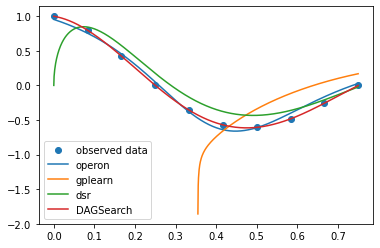

In [1394]:
import warnings
x_values = np.linspace(0, 0.75, 1000).reshape(-1, 1)
X = np.linspace(0, 0.75, 10).reshape(-1, 1)
y = np.exp(-X[:, 0])*np.cos(2*np.pi*X[:, 0])
plt.scatter(X, y, color = 'tab:blue', label = 'observed data', zorder = 2)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for regr_name in results_dict:

        if regr_name not in ['linreg', 'polyreg2', 'polyreg3']:

            model = results_dict[regr_name]['model']
            model = utils.round_floats(model)
            func = sympy.lambdify(sympy.Symbol('x_0'), model)
            pred = func(x_values)
            plt.plot(x_values, pred, label = regr_name)

            print(f'{regr_name}:')
            print('############')
            print(f'{model}\n')

        
        
plt.legend()

In [1333]:
np.random.seed(0)
x_values = np.linspace(0, 0.75, 1000).reshape(-1, 1)
X = np.linspace(0, 0.75, 10).reshape(-1, 1)
y = np.exp(-X[:, 0])*np.cos(2*np.pi*X[:, 0])

In [1334]:
importlib.reload(regressors)

<module 'regressors.regressors' from 'C:\\Users\\Paul Kahlmeyer\\OneDrive\\PhD\\DAG_search\\regressors\\regressors.py'>

In [1335]:
from sklearn import linear_model

In [1338]:
from regressors import regressors
regr = regressors.PolyReg(4)
regr.fit(X, y)
pred_poly = regr.predict(x_values)

In [1337]:
regr.model()

-34.4572579935495*x_0**4 + 60.3564758586689*x_0**3 - 27.0078906836237*x_0**2 - 0.489063145387913*x_0 + 0.998021329322976

In [1339]:
pred_symb = np.exp(-x_values[:, 0])*np.cos(6*x_values[:, 0])
pred_decay = np.exp(-x_values[:, 0])
pred_oscillation = np.cos(6*x_values[:, 0])

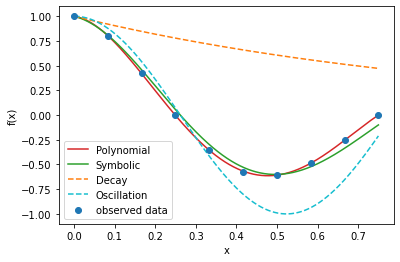

In [1400]:

plt.plot(x_values, pred_poly, color ='tab:red', label = 'Polynomial')
plt.plot(x_values, pred_symb, color ='tab:green', label = 'Symbolic')
plt.plot(x_values, pred_decay, color ='tab:orange', label = 'Decay', linestyle = '--')
plt.plot(x_values, pred_oscillation, color ='tab:cyan', label = 'Oscillation', linestyle = '--')
plt.scatter(X, y, color = 'tab:blue', label = 'observed data', zorder = 2)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

plt.savefig(f'results/figures/intro_example.pdf', bbox_inches = 'tight')

## Price Theorem does not hold here

If occurence of a Trait in population correlates positively with fitness of population, it will occur more often.

Here: Track fitness of population and occurences of traits of target expression

Trait = Subexpression

In [141]:
ds_name = 'Feynman'

load_path = f'results/{ds_name}/covariances.p'
with open(load_path, 'rb') as handle:
    results_dict = pickle.load(handle)

In [142]:
problems = list(results_dict.keys())
nmb_traits = np.array([len(results_dict[problem_name]['covariances']) for problem_name in results_dict])
max_traits = max(nmb_traits)


sort_idx = np.argsort(-nmb_traits)
problems = [problems[i] for i in sort_idx]

disp_matrix = -np.ones((max_traits, len(results_dict)))

for i, problem in enumerate(problems):
    covs = results_dict[problem]['covariances']
    disp_matrix[:len(covs), i] = covs

Text(0.5, 1.0, 'Feynman')

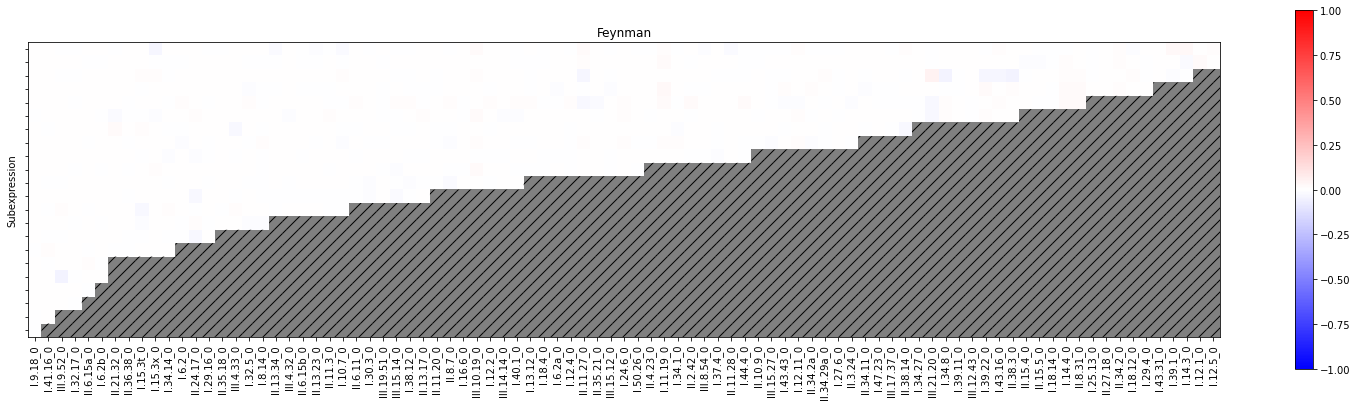

In [143]:
fs = 0.3
plt.figure(figsize = (len(problems)*fs, max_traits*fs))
plt.imshow(disp_matrix, cmap = 'bwr', vmin = -1, vmax = 1)
plt.colorbar()

# add gray hatched area
tmp_img = (disp_matrix == -1).astype(float)
tmp_img[tmp_img == 0] = np.nan
mask = ~np.isnan(tmp_img)
tmp_img[mask] = 0.5
plt.imshow(tmp_img, cmap = 'gray', vmin = 0.0, vmax = 1.0)
zm = np.ma.masked_where(~mask, tmp_img)
plt.pcolor(np.arange(len(problems)), np.arange(max_traits), zm, hatch='//', alpha=0.0)

plt.xticks(range(len(problems)), problems, rotation = 90)
plt.yticks(range(max_traits), [])
plt.ylabel('Subexpression')
plt.title(ds_name)

## Local Minima

For a problem:
- sample population
- connect expressions with edit distance 1
- identify local minima in this population (= all neighbours are worse) 

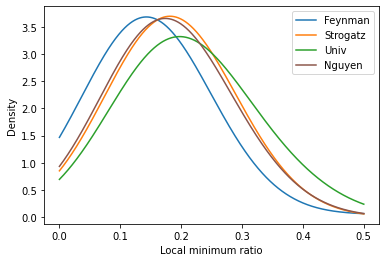

In [145]:
# estimate density
from sklearn.neighbors import KernelDensity
ds_names = ['Feynman', 'Strogatz', 'Univ', 'Nguyen']
ds_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:brown']

x_values = np.linspace(0, 0.5, 1000).reshape(-1, 1)

for ds_name, ds_color in zip(ds_names, ds_colors):

    load_path = f'results/{ds_name}/local_minima.p'
    if os.path.exists(load_path):
        with open(load_path, 'rb') as handle:
            results_dict = pickle.load(handle)
            
        ratios = np.array([results_dict[p] for p in results_dict])
        kde = KernelDensity(kernel='gaussian', bandwidth = 0.1).fit(ratios.reshape(-1, 1))
        log_densities = kde.score_samples(x_values)

        plt.plot(x_values, np.exp(log_densities), color = ds_color, label = ds_name)


plt.xlabel('Local minimum ratio')
plt.ylabel('Density')
plt.legend()

if not os.path.exists('results/figures'):
    os.mkdirs('results/figures')
plt.savefig(f'results/figures/local_minima.pdf', bbox_inches = 'tight')

## Fitness Distance Correlation

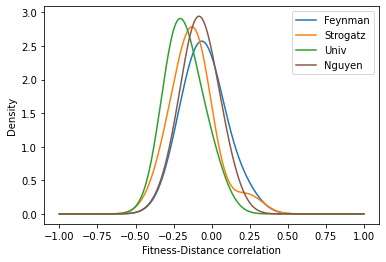

In [368]:
# estimate density
from sklearn.neighbors import KernelDensity
ds_names = ['Feynman', 'Strogatz', 'Univ', 'Nguyen']
ds_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:brown']

x_values = np.linspace(-1, 1, 1000).reshape(-1, 1)

for ds_name, ds_color in zip(ds_names, ds_colors):

    load_path = f'results/{ds_name}/fdc.p'
    with open(load_path, 'rb') as handle:
        results_dict = pickle.load(handle)
    fdcs = np.array([results_dict[p] for p in results_dict])
    kde = KernelDensity(kernel='gaussian', bandwidth = 0.1).fit(fdcs.reshape(-1, 1))
    log_densities = kde.score_samples(x_values)
    
    plt.plot(x_values, np.exp(log_densities), color = ds_color, label = ds_name)


plt.xlabel('Fitness-Distance correlation')
plt.ylabel('Density')
plt.legend()

## Scalability

Takeaway: Our Approach has potential to scale with

- number of calculation nodes (= max size of expression)
- number of orders (= coverage)

In [1500]:
ds_name = 'Feynman'

load_path = f'datasets/{ds_name}/tasks.p'
with open(load_path, 'rb') as handle:
    task_dict = pickle.load(handle)
    
load_path = f'results/{ds_name}/scalings.p'
with open(load_path, 'rb') as handle:
    res_dict = pickle.load(handle)

seeds = sorted(list(res_dict.keys()))
nodes = sorted(list(res_dict[seeds[0]].keys()))
orders = sorted(list(res_dict[seeds[0]][nodes[0]].keys()))
problems = list(task_dict.keys())

# average results for each seed 
# how to access: [rand_state][n_calc_nodes][max_orders][problem]

recovery_results = {}
time_results = {}
for n_calc_nodes in nodes:
    recovery_results[n_calc_nodes] = {}
    time_results[n_calc_nodes] = {}
    
    for max_orders in orders:
        all_recs = []
        all_times = []
        for seed in seeds:
            recs = []
            times = []
            
            if (n_calc_nodes in res_dict[seed]) and (max_orders in res_dict[seed][n_calc_nodes]):  
                #for problem in res_dict[seed][n_calc_nodes][max_orders]:
                for problem in problems:
                    recs += res_dict[seed][n_calc_nodes][max_orders][problem]['recovery']
                    times += res_dict[seed][n_calc_nodes][max_orders][problem]['times']
                avg_rec = np.mean(recs)
                avg_time = np.mean(times)

                all_recs.append(avg_rec)
                all_times.append(avg_time)
        # here we have lists with avg results for each seed    
        
        if len(all_recs) > 0:
        
            recovery_results[n_calc_nodes][max_orders] = np.mean(all_recs)
            time_results[n_calc_nodes][max_orders] = np.mean(all_times)

In [1504]:
# print table
table_data, n_round = recovery_results, 3
#table_data, n_round = time_results, 1


# header
s = '\\begin{tabular}{c' + 'l'*len(orders) + '}'
print(s)

s = '\\diagbox{$n$}{$o$}' # insert diag cell here
for o in orders:
    s += f'&{o}'
s += '\\\\'
print(s)
print('\\toprule')

# rows
for n_calc_nodes in nodes:
    s = str(n_calc_nodes)
    for o in orders:
        if n_calc_nodes in table_data:
            if o in table_data[n_calc_nodes]:
                v = np.round(table_data[n_calc_nodes][o], n_round)
                s += f'&{v}'
                  
            else:
                s += '&-'
        else:
            s += '&-'
    s += '\\\\'
    print(s)
s = '\\end{tabular}'
print(s)

\begin{tabular}{cllll}
\diagbox{$n$}{$o$}&10000&50000&100000&200000\\
\toprule
1&0.105&0.105&0.105&0.105\\
2&0.318&0.337&0.337&0.337\\
3&0.349&0.421&0.44&0.444\\
4&0.387&0.444&0.459&0.478\\
\end{tabular}


## Experiment: local minima

Takeaway: Local Search does not work, because we have lots of local minima.

In [71]:
load_path = 'results/local_minima_exp.p'
with open(load_path, 'rb') as handle:
    results = pickle.load(handle)

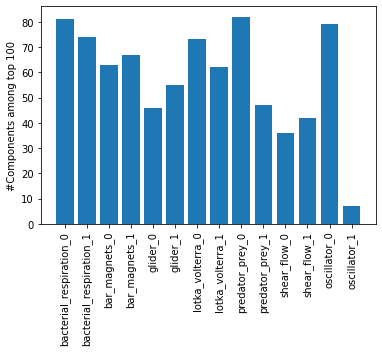

In [72]:
names = list(results.keys())
values = [results[n]['groups'] for n in names]
plt.bar(range(len(names)), values)
plt.xticks(range(len(names)), names, rotation = 90)
plt.ylabel(f'#Components among top {results[names[0]]["topk"]}')

if not os.path.exists('results/figures'):
    os.mkdirs('results/figures')
plt.savefig(f'results/figures/local_minima.pdf', bbox_inches = 'tight')

## Experiment: Black Box vs. Symbolic

Takeaway: If you care about model fit, use Black Box. 

In [703]:
import pickle
regs = ['linreg', 'polyreg2', 'polyreg3', 'operon', 'gplearn', 'DAGSearch', 'MLP', 'dsr', 'esr', 'DAGSearch_grad', 'DAGSearch_poly']
ds_name = 'Feynman' # Strogatz, Feynman, Nguyen, Univ  

load_path = f'datasets/{ds_name}/tasks.p'
with open(load_path, 'rb') as handle:
    task_dict = pickle.load(handle)

Read Results

In [704]:
regressor_name = 'DAGSearch_poly'
load_path = f'results/{ds_name}/{regressor_name}_results.p'
if os.path.exists(load_path):
    with open(load_path, 'rb') as handle:
        results_dict1 = pickle.load(handle)

regressor_name = 'DAGSearch'
load_path = f'results/{ds_name}/{regressor_name}_results.p'
if os.path.exists(load_path):
    with open(load_path, 'rb') as handle:
        results_dict2 = pickle.load(handle)

In [705]:
for problem_name in results_dict1:
    if problem_name in results_dict2:
        rec1 = results_dict1[problem_name]['recovery'][0]
        rec2 = results_dict2[problem_name]['recovery'][0]
        if rec1 != rec2:
            print(problem_name, rec1, rec2)

I.11.19 True False
I.12.11 True False
I.12.2 True False
I.13.12 True False
I.13.4 True False
I.16.6 True False
I.18.4 True False
I.24.6 True False
I.32.5 True False
I.37.4 True False
I.44.4 True False
II.11.20 True False
II.11.3 True False
II.21.32 True False
II.34.29b True False
II.6.11 True False
III.13.18 True False
III.15.12 True False
III.19.51 True False


In [706]:
p = len(results_dict1)/len(task_dict)
print(f'{round(100*p)}% finished')
for problem in results_dict1:
    print(problem, results_dict1[problem]['recovery'], task_dict[problem]['X'].shape[1])

100% finished
I.10.7 [False] 3
I.11.19 [True] 6
I.12.1 [True] 2
I.12.11 [True] 5
I.12.2 [True] 4
I.12.4 [True] 3
I.12.5 [True] 2
I.13.12 [True] 5
I.13.4 [True] 4
I.14.3 [True] 3
I.14.4 [True] 2
I.15.3t [False] 4
I.15.3x [False] 4
I.16.6 [True] 3
I.18.12 [True] 3
I.18.14 [True] 4
I.18.4 [True] 4
I.24.6 [True] 4
I.25.13 [True] 2
I.27.6 [True] 3
I.29.16 [False] 4
I.29.4 [True] 2
I.30.3 [False] 3
I.32.17 [False] 6
I.32.5 [True] 4
I.34.1 [True] 3
I.34.14 [False] 3
I.34.27 [True] 2
I.34.8 [True] 4
I.37.4 [True] 3
I.38.12 [True] 4
I.39.1 [True] 2
I.39.11 [True] 3
I.39.22 [True] 4
I.40.1 [False] 6
I.41.16 [False] 5
I.43.16 [True] 4
I.43.31 [True] 3
I.43.43 [True] 4
I.44.4 [True] 5
I.47.23 [True] 3
I.50.26 [False] 4
I.6.2 [False] 2
I.6.2a [True] 1
I.6.2b [False] 3
I.8.14 [False] 4
I.9.18 [False] 9
II.10.9 [True] 3
II.11.20 [True] 5
II.11.27 [False] 4
II.11.28 [False] 2
II.11.3 [True] 5
II.13.17 [True] 4
II.13.23 [False] 3
II.13.34 [False] 3
II.15.4 [True] 3
II.15.5 [True] 3
II.2.42 [True] 5
II.

In [684]:
from sklearn.metrics import r2_score
# falsely not recovered expressions
for problem in results_dict1.keys():
    for y, pred, rec in zip(results_dict1[problem]['y_train'], results_dict1[problem]['pred_train'], results_dict1[problem]['recovery']):
        try:
            r2 = r2_score(y, pred)
            
            if r2 == 1.0 and not rec:
                print(problem)
        except:
            print(f'Exception at {problem}')
            pass
    

In [685]:
from sklearn.metrics import r2_score
# read results
res = {}
for regressor_name in regs:
    load_path = f'results/{ds_name}/{regressor_name}_results.p'
    if os.path.exists(load_path):
        res[regressor_name] = {}
        with open(load_path, 'rb') as handle:
            results_dict = pickle.load(handle)

        # avg. recovery
        recoveries = []
        for problem in results_dict.keys():
            #for rec in results_dict[problem]['recovery']:
            #    recoveries.append(rec)
            for y, pred, rec in zip(results_dict[problem]['y_test'], results_dict[problem]['pred_test'], results_dict[problem]['recovery']):
                r2 = r2_score(y, pred)
                recoveries.append(rec or r2==1.0)
        res[regressor_name]['recovery'] = np.mean(recoveries)


        # avg. RMSE
        rmses_train = []
        rmses_test = []
        for problem in results_dict.keys():
            for y, pred in zip(results_dict[problem]['y_train'], results_dict[problem]['pred_train']):
                rmse = np.sqrt(np.mean((y - pred)**2))
                rmses_train.append(rmse)
            for y, pred in zip(results_dict[problem]['y_test'], results_dict[problem]['pred_test']):
                rmse = np.sqrt(np.mean((y - pred)**2))
                rmses_test.append(rmse)
        res[regressor_name]['rmse_train'] = np.mean(rmses_train)
        res[regressor_name]['rmse_test'] = np.mean(rmses_test)

        # median R2
        r2s_train = []
        r2s_test = []
        for problem in results_dict.keys():
            for y, pred in zip(results_dict[problem]['y_train'], results_dict[problem]['pred_train']):
                r2 = r2_score(y, pred)
                r2s_train.append(r2)
            for y, pred in zip(results_dict[problem]['y_test'], results_dict[problem]['pred_test']):
                r2 = r2_score(y, pred)
                r2s_test.append(r2)
        res[regressor_name]['r2_train'] = np.median(r2s_train)
        res[regressor_name]['r2_test'] = np.median(r2s_test)
            
        # expression size
        expr_sizes = []
        for problem in results_dict.keys():
            for expr in results_dict[problem]['exprs']:
                expr_sizes.append(utils.tree_size(expr))
        if len(expr_sizes) > 0:
            res[regressor_name]['complexity'] = np.mean(expr_sizes)
            
        # processing times
        time = 0.0
        counter = 0
        for problem in results_dict.keys():
            for t in results_dict[problem]['times']:
                time += t
                counter += 1
        time = time/counter
        
        res[regressor_name]['time'] = time

In [686]:
res.keys()

dict_keys(['DAGSearch_poly'])

In [674]:
res['DAGSearch_grad']

{'recovery': 0.5894736842105263,
 'rmse_train': 3.8690239903821055,
 'rmse_test': 3.748260739387594,
 'r2_train': 0.9999999999999977,
 'r2_test': 0.9999999999999976,
 'complexity': 11.91578947368421,
 'time': 1745.6934323051235}

In [687]:
res['DAGSearch_poly']

{'recovery': 1.0,
 'rmse_train': 0.0040364617985090894,
 'rmse_test': 0.004028257532182031,
 'r2_train': 1.0,
 'r2_test': 1.0,
 'complexity': 7.666666666666667,
 'time': 58.43127061496489}

### Plots

In [676]:
reg_names = {
    'esr' : 'ESR',
    'DAGSearch' : 'DAGSearch',
    'DAGSearch_grad' : 'DAGSearch_grad',
    'DAGSearch_poly' : 'DAGSearch_poly',
    'linreg' : 'LinReg',
    'polyreg2' : 'PolyReg2',
    'polyreg3' : 'PolyReg3',
    'gplearn' : 'GPlearn',
    'dsr' : 'DSR',
    'operon' : 'Operon',
    'MLP' : 'MLP'
}

crit_names = {
    'recovery' : 'Recovery',
    'rmse_train' : 'RMSE Train',
    'rmse_test' : 'RMSE Test',
    'r2_train' : '$R^2$ Train',
    'r2_test' : '$R^2$ Test',
    'complexity' : 'Complexity',
    'time' : 'Processing Time'
}

In [677]:
def get_pareto_idxs(obj1, obj2):
    M = np.column_stack([obj1, obj2])
    ret = []
    for i, p in enumerate(M):
        is_dominated = np.any(np.all(M < p, axis = 1))
        if not is_dominated:
            ret.append(i)
    return np.array(ret)

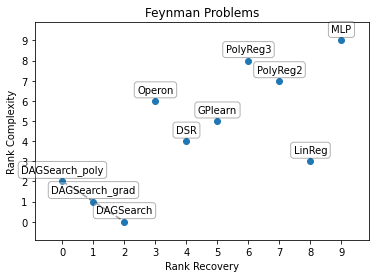

In [678]:
cat_x = 'r2_test'
cat_x = 'recovery'
def_value_x = 0.0
cat_y = 'complexity'
def_value_y = np.inf

# assume lower is better (negate R2, recovery)

regs_present = list(res.keys())
v1 = -np.array([res[regressor_name][cat_x] if cat_x in res[regressor_name] else def_value_x for regressor_name in regs_present])
v2 = np.array([res[regressor_name][cat_y] if cat_y in res[regressor_name] else def_value_y for regressor_name in regs_present])

ranks_x = np.argsort(np.argsort(v1))
ranks_y = np.argsort(np.argsort(v2))


pareto_idxs = get_pareto_idxs(ranks_x, ranks_y)
pareto_idxs = pareto_idxs[np.argsort([ranks_x[i] for i in pareto_idxs])] # sort by x rank (for plotting)

plt.scatter(ranks_x, ranks_y, zorder = 1)
plt.plot([ranks_x[i] for i in pareto_idxs], [ranks_y[i] for i in pareto_idxs], color = 'gray', linestyle = '--', zorder = 0)


# add labels
offset_x = 0.9
offset_y = 0.9
for i in range(len(regs_present)):
    s = reg_names[regs_present[i]]
    x = ranks_x[i]
    y = ranks_y[i] + .3
    ha = 'center'
    va = 'bottom'
    plt.text(s = s, x = x, y = y, ha = ha, va = va, bbox=dict(facecolor='w', edgecolor='black', boxstyle='round', alpha=0.3))
plt.xlim(0-offset_x, len(regs_present)-1+offset_x)
plt.ylim(0-offset_y, len(regs_present)-1+offset_y)
plt.xticks(range(len(regs_present)))
plt.yticks(range(len(regs_present)))

plt.xlabel(f'Rank {crit_names[cat_x]}')
plt.ylabel(f'Rank {crit_names[cat_y]}')
plt.title(f'{ds_name} Problems')


if not os.path.exists('results/figures'):
    os.mkdirs('results/figures')
plt.savefig(f'results/figures/scatterplot_{ds_name}.pdf', bbox_inches = 'tight')

In [688]:
# print a table

regs = list(res.keys())
crits = list(res[regs[0]].keys())


sort_idx = np.argsort([-res[reg]['recovery'] for reg in regs])
regs = [regs[i] for i in sort_idx]

# header
s = '\\begin{tabular}{l' + 'l'*len(crits) + '}'
print(s)
s = ''
for crit in crits:
    s += f'&{crit_names[crit]}'
s += '\\\\'
print(s)
print('\\toprule')

# rows
for reg in regs:
    s = reg_names[reg]
    for crit in crits:
        if crit in res[reg]:
            v = res[reg][crit]
            v = np.round(v, 2)
            s += f'&{v}'
        else:
            s += '&-'
    s += '\\\\'
    print(s)
s = '\\end{tabular}'
print(s)

\begin{tabular}{llllllll}
&Recovery&RMSE Train&RMSE Test&$R^2$ Train&$R^2$ Test&Complexity&Processing Time\\
\toprule
DAGSearch_poly&1.0&0.0&0.0&1.0&1.0&7.67&58.43\\
\end{tabular}


## Experiment: Symbolic vs. Numeric Proximity

Fitness Distance Correlation

Takeaway: Symbolic Measures do not correlate with Numeric Measures

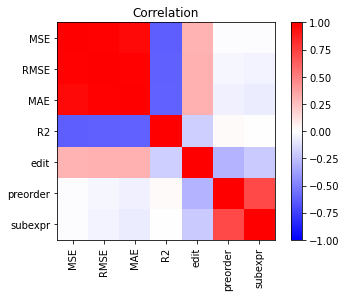

In [83]:
corr_matrix = np.load('results/corr_matrix.npy')
with open(f'results/distance_dict.p', 'rb') as handle:
    dist_dict = pickle.load(handle)
methods = list(dist_dict.keys())


plt.imshow(corr_matrix, vmin = -1, vmax = 1, cmap = 'bwr')
plt.colorbar()
plt.xticks(range(corr_matrix.shape[0]), methods, rotation = 90)
plt.yticks(range(corr_matrix.shape[0]), methods)
plt.title('Correlation')

if not os.path.exists('results/figures'):
    os.mkdirs('results/figures')
plt.savefig('results/figures/corr_plot.pdf', bbox_inches = 'tight')